# Notebook avant la fin 

In [12]:
import pandas as pd 

train = pd.read_csv('Concours Kaggle/Surpoids_Multiclasse/train.csv')
test = pd.read_csv('Concours Kaggle/Surpoids_Multiclasse/test.csv')
train.head()


train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**Modification type colonne**

In [13]:
train['Gender'] = train['Gender'].replace({'Male' : 0, 'Female' : 1})
train['family_history_with_overweight'] = train['family_history_with_overweight'].replace({'yes' : 1, 'no' : 0})
train['FAVC'] = train['FAVC'].replace({'yes' : 1, 'no' : 0})
train['SMOKE'] = train['SMOKE'].replace({'yes' : 1, 'no' : 0})
train['SCC'] = train['SCC'].replace({'yes' : 1, 'no' : 0})
train['CAEC'] = train['CAEC'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
train['CALC'] = train['CALC'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
train['NObeyesdad'] = train['NObeyesdad'].replace({'Insufficient_Weight' : 0, 'Normal_Weight' : 1, 'Overweight_Level_I' : 2, 'Overweight_Level_II' : 3, 'Obesity_Type_I' : 4, 'Obesity_Type_II' : 5, 'Obesity_Type_III' : 6})
train['MTRANS'] = train['MTRANS'].replace({'Public_Transportation' : 0, 'Automobile' : 1, 'Motorbike' : 2, 'Bike' : 3, 'Walking' : 4})

In [14]:
test['Gender'] = test['Gender'].replace({'Male' : 0, 'Female' : 1})
test['family_history_with_overweight'] = test['family_history_with_overweight'].replace({'yes' : 1, 'no' : 0})
test['FAVC'] = test['FAVC'].replace({'yes' : 1, 'no' : 0})
test['SMOKE'] = test['SMOKE'].replace({'yes' : 1, 'no' : 0})
test['SCC'] = test['SCC'].replace({'yes' : 1, 'no' : 0})
test['CAEC'] = test['CAEC'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
test['CALC'] = test['CALC'].replace({'no' : 0, 'Sometimes' : 1, 'Frequently' : 2, 'Always' : 3})
#test['NObeyesdad'] = test['NObeyesdad'].replace({'Insufficient_Weight' : 0, 'Normal_Weight' : 1, 'Overweight_Level_I' : 2, 'Overweight_Level_II' : 3, 'Obesity_Type_I' : 4, 'Obesity_Type_II' : 5, 'Obesity_Type_III' : 6})
test['MTRANS'] = test['MTRANS'].replace({'Public_Transportation' : 0, 'Automobile' : 1, 'Motorbike' : 2, 'Bike' : 3, 'Walking' : 4})

# Rajout de la colonne de L'IMC 

In [15]:
train['IMC'] = train['Weight'] / ((train['Height']) ** 2)

In [16]:
train.head()

id  Gender        Age    Height      Weight  \
0   0       0  24.443011  1.699998   81.669950   
1   1       1  18.000000  1.560000   57.000000   
2   2       1  18.000000  1.711460   50.165754   
3   3       1  20.952737  1.710730  131.274851   
4   4       0  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     1      0   
1                               1     1  2.000000  3.000000     2      0   
2                               1     1  1.880534  1.411685     1      0   
3                               1     1  3.000000  3.000000     1      0   
4                               1     1  2.679664  1.971472     1      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  NObeyesdad        IMC  
0  2.763573    0  0.000000  0.976473     1       0           3  28.259565  
1  2.000000    0  1.000000  1.000000     0       1           1  23.422091  
2  1.910378    0  0.866045  1.673584     0       0           0  17.126706  
3  1.674061    0  1.467863  0.780199     1       0           6  44.855798  
4  1.979848    0  1.967973  0.931721     1       0           3  25.599151

In [17]:
test['IMC'] = test['Weight'] / ((test['Height']) ** 2)

# Analyse descriptive 

**Distribution de L'imc**

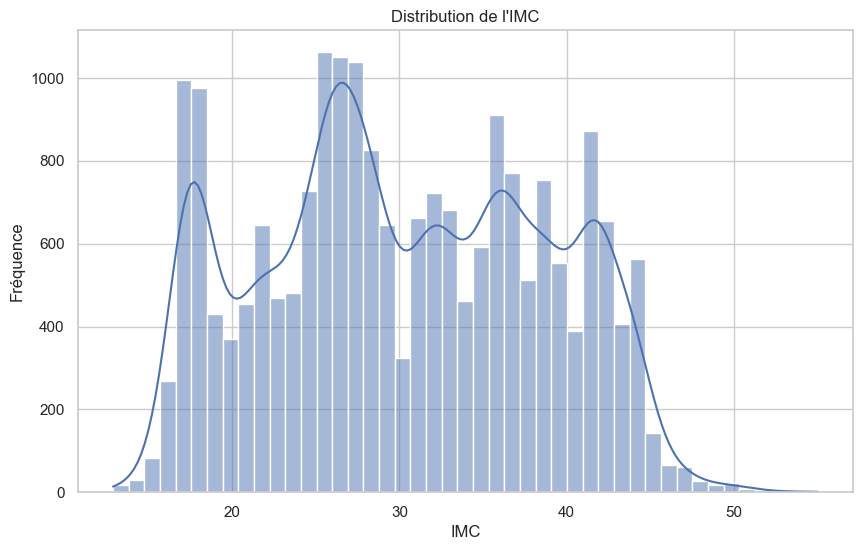

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Réglage du style de seaborn
sns.set(style="whitegrid")

# Distribution de l'IMC
plt.figure(figsize=(10, 6))
sns.histplot(train['IMC'], kde=True)
plt.title('Distribution de l\'IMC')
plt.xlabel('IMC')
plt.ylabel('Fréquence')
plt.show()


**Distribution de L'imc par genre**

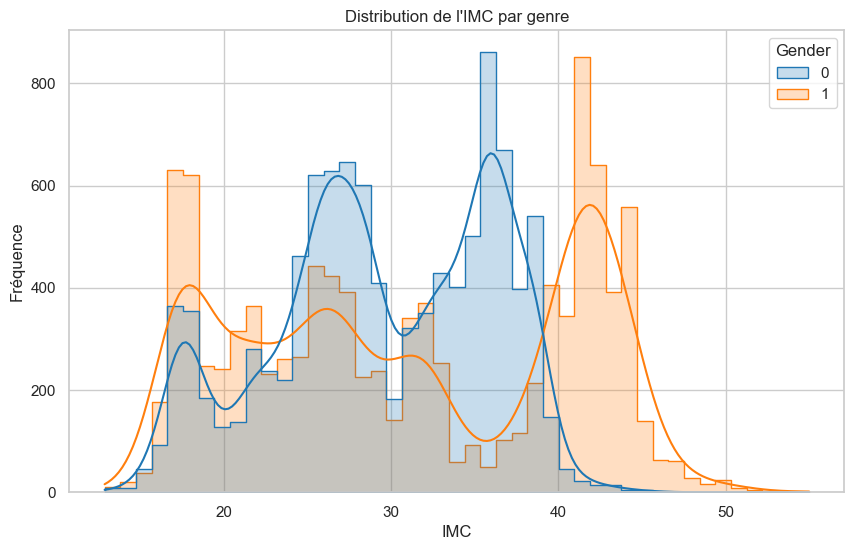

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='IMC', hue='Gender', kde=True, element="step", palette="tab10")
plt.title('Distribution de l\'IMC par genre')
plt.xlabel('IMC')
plt.ylabel('Fréquence')
plt.show()


**Comparaison du poids par genre**

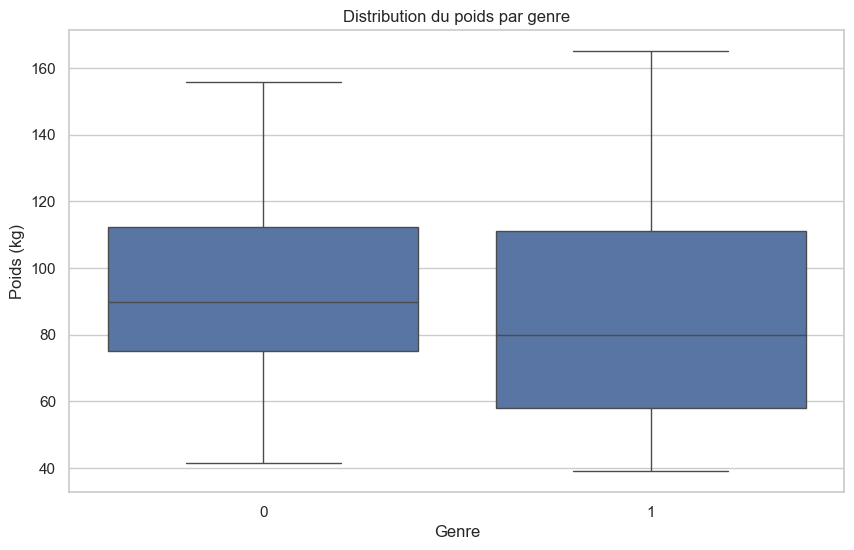

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Weight', data=train)
plt.title('Distribution du poids par genre')
plt.xlabel('Genre')
plt.ylabel('Poids (kg)')
plt.show()

**Correlation entre caractéristique numerique**

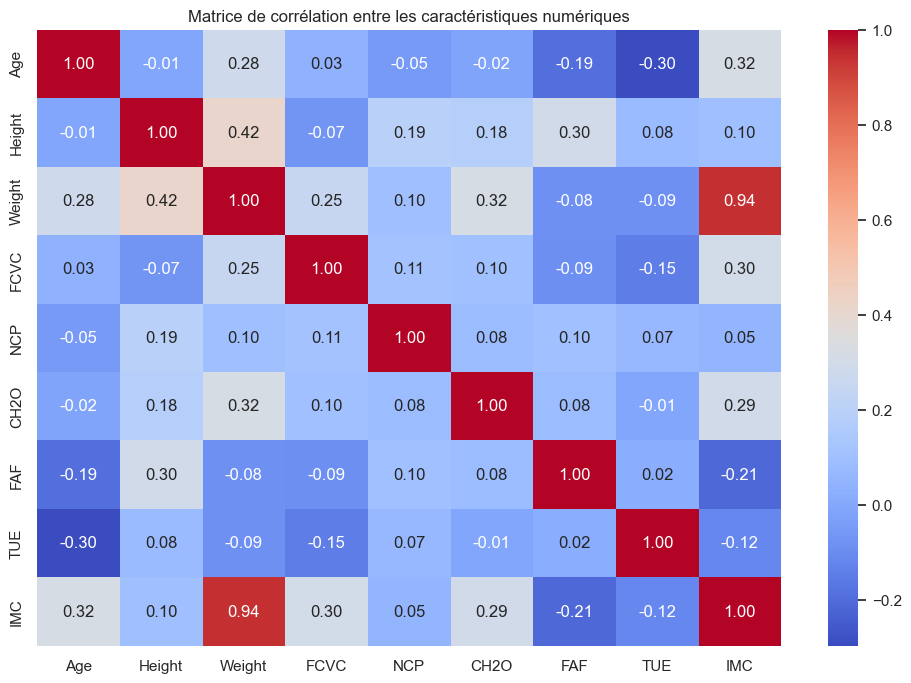

In [21]:
# Calcul de la matrice de corrélation
corr = train.select_dtypes(include=['float64']).corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation entre les caractéristiques numériques')
plt.show()

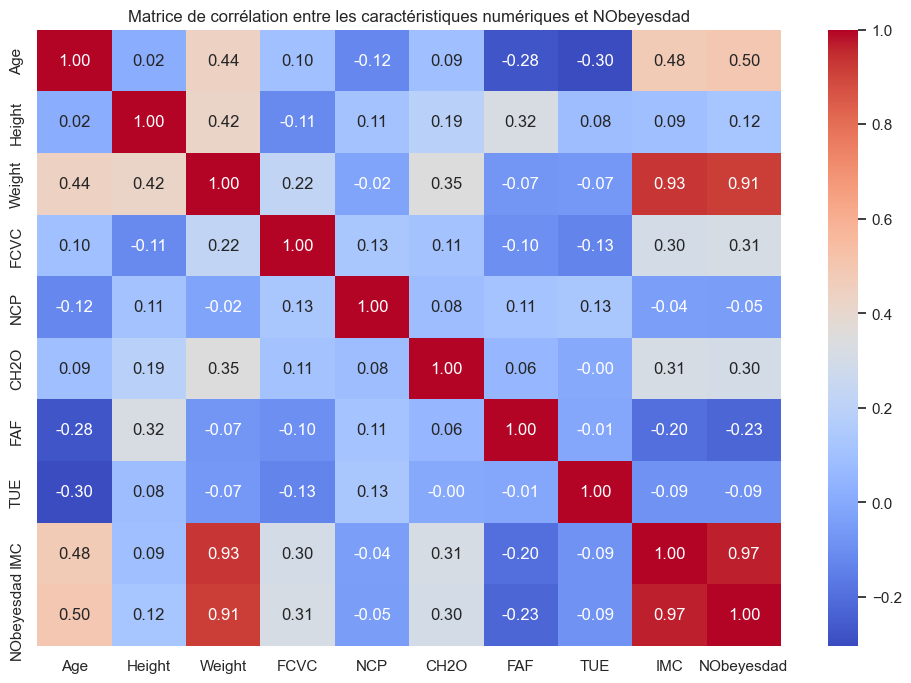

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des colonnes de type float64 et ajout de la colonne NObeyesdad
features_float64 = train.select_dtypes(include=['float64'])
features_corr = features_float64.join(train['NObeyesdad'])

# Calcul de la matrice de corrélation
corr = features_corr.corr(method='spearman')

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation entre les caractéristiques numériques et NObeyesdad')
plt.show()


# V cramér

In [23]:
for i in range(0, len(train.columns)):
    Name = train.iloc[:, i].name
    if str(train[Name].dtypes) == 'int64':
        train[Name] = train[Name].astype('category')

train.dtypes

id                                category
Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
IMC                                float64
dtype: object

In [24]:
for i in range(0, len(test.columns)):
    Name = test.iloc[:, i].name
    if str(test[Name].dtypes) == 'int64':
        test[Name] = test[Name].astype('category')

test.dtypes

id                                category
Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
IMC                                float64
dtype: object

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    # Table de contingence
    confusion_matrix = pd.crosstab(x, y)
    
    # Test du chi-carré
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Exemple d'utilisation avec deux variables catégorielles 'Gender' et 'NObeyesdad'
cramers_v_value = cramers_v(train['Gender'], train['NObeyesdad'])
print(f"V de Cramér entre Gender et NObeyesdad : {cramers_v_value}")


V de Cramér entre Gender et NObeyesdad : 0.6187857134727643


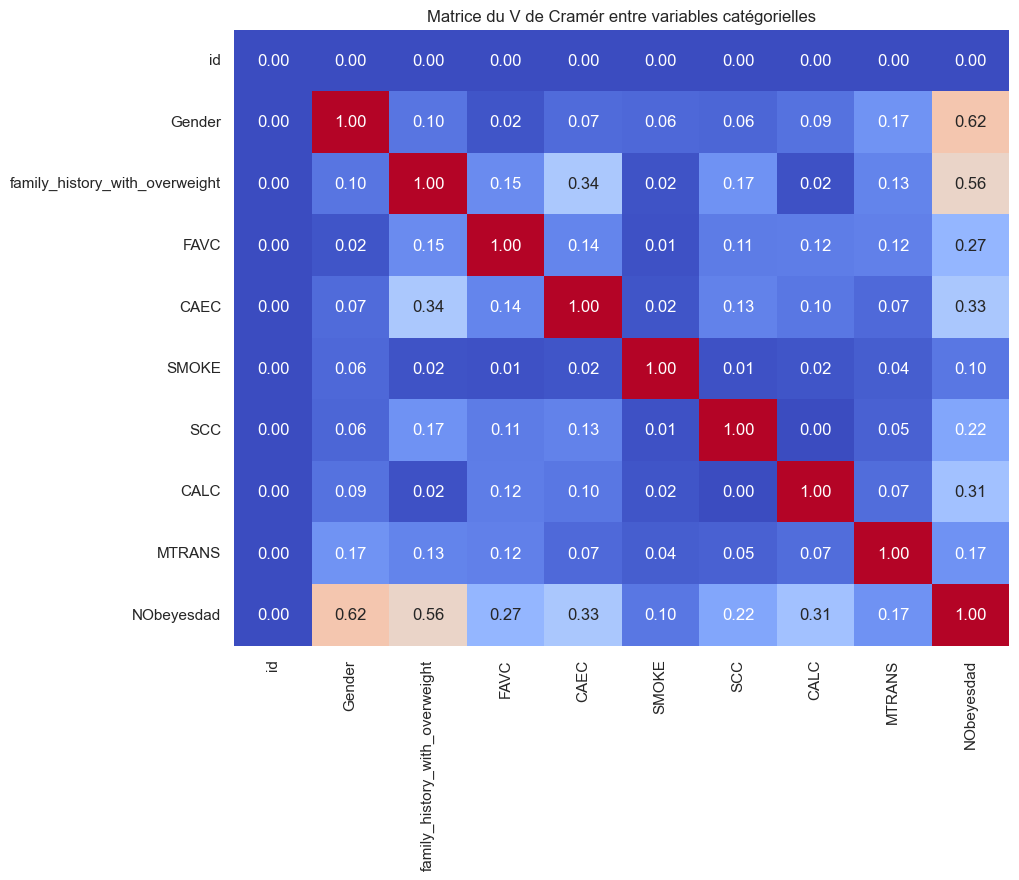

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assumons que 'data' est votre DataFrame


# Définition de la fonction cramers_v
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom <= 0:
        return 0  # Retourne 0 si la division par zéro est possible
    return np.sqrt(phi2corr / denom)

# Identification des variables catégorielles
categorical_vars = train.select_dtypes(include=['object', 'category']).columns

# Initialisation de la matrice de Cramér V
cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_vars), len(categorical_vars))),
                                index=categorical_vars, columns=categorical_vars)

# Calcul de Cramér V pour chaque paire de variables catégorielles et stockage dans la matrice
for col1 in categorical_vars:
    for col2 in categorical_vars:
        cramers_v_matrix.loc[col1, col2] = cramers_v(train[col1], train[col2])

# Affichage de la matrice de Cramér V
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=False)
plt.title("Matrice du V de Cramér entre variables catégorielles")
plt.show()


# Modèle 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Séparation des caractéristiques et de la cible
X = train.drop(['NObeyesdad'], axis=1) # Supprimez la colonne cible et d'autres non nécessaires
y = train['NObeyesdad']

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Random Forest**

In [28]:
# Initialisation du modèle Forêt Aléatoire
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Prédiction sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")
print(classification_report(y_test, y_pred))


Précision du modèle : 0.9024566473988439
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       524
           1       0.88      0.88      0.88       626
           2       0.77      0.79      0.78       484
           3       0.81      0.79      0.80       514
           4       0.89      0.87      0.88       543
           5       0.97      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



**XGBoost**

In [98]:
#!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 220.0 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [30]:
from sklearn.model_selection import train_test_split
import xgboost as xgb


X = train.drop(['NObeyesdad'], axis=1)  # Assurez-vous d'exclure la colonne cible et d'autres colonnes non nécessaires
y = train['NObeyesdad']

# Division des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Convertir les variables catégorielles en type 'category' si ce n'est pas déjà le cas
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category')

# Encodage One-Hot des variables catégorielles
X_encoded = pd.get_dummies(X, drop_first=True)

# Division des données en ensemble d'entraînement et de test après l'encodage
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle XGBoost sur les données encodées
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), seed=42)
xgb_classifier.fit(X_train_encoded, y_train)

# Prédiction et évaluation sur l'ensemble de test encodé
y_pred = xgb_classifier.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy}")


Précision du modèle : 0.9048651252408478


**Test de plusieurs paramètres**

In [111]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Définition de la grille d'hyperparamètres à tester
#
   # 'n_estimators': [50,100,150, 200],
   # 'learning_rate': [0.01,0.05,0.07, 0.1],
   # 'max_depth': [3,5,10,20],
   # 'subsample': [0.2,0.4,0.5,0.7],
   ## 'colsample_bytree': [0.6,0.65,0.7,1],
#}
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
}

In [112]:
# Configuration de GridSearchCV
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), seed=42, use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)


In [113]:
# Exécution de la recherche par grille
grid_search.fit(X_train_encoded, y_train)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time= 5.0min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time= 5.0min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time= 5.0min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time= 5.0min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time= 5.1min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time= 5.2min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time= 9.2min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time= 9.3min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=2

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=7,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.7, 1]},
             scoring='accuracy', verbose=2)

In [114]:
# Meilleurs paramètres et meilleure exactitude
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleure exactitude:", grid_search.best_score_)

# Utiliser le meilleur modèle
best_model = grid_search.best_estimator_


Meilleurs paramètres: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Meilleure exactitude: 0.9053358009896734


# passage au jeu de test

In [32]:
import xgboost as xgb

# Configuration du modèle avec les meilleurs hyperparamètres
best_params = {
    'objective': 'multi:softmax',
    'num_class': len(y.unique()),
    'seed': 42,
    'use_label_encoder': False,
    'eval_metric': 'mlogloss',
    'colsample_bytree': 0.7,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 200,
    'subsample': 0.7
}

best_xgb_model = xgb.XGBClassifier(**best_params)


In [33]:
# Entraînement du modèle sur l'ensemble d'entraînement
best_xgb_model.fit(X_train_encoded, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=7, num_parallel_tree=None, ...)

In [34]:
test_encoded = pd.get_dummies(test, drop_first=True)

# Ajouter des colonnes manquantes et ajuster l'ordre
missing_cols = set(X_train_encoded.columns) - set(test_encoded.columns)
for c in missing_cols:
    test_encoded[c] = 0
test_encoded = test_encoded[X_train_encoded.columns]

/var/folders/bv/6g0jn7nd6173bdztnc1t0nk00000gn/T/ipykernel_45604/539069247.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[c] = 0
/var/folders/bv/6g0jn7nd6173bdztnc1t0nk00000gn/T/ipykernel_45604/539069247.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_encoded[c] = 0
/var/folders/bv/6g0jn7nd6173bdztnc1t0nk00000gn/T/ipykernel_45604/539069247.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joi

In [128]:
# Prédiction avec le modèle
new_predictions = best_xgb_model.predict(test_encoded)


In [131]:
train.dtypes

id                                category
Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
NObeyesdad                        category
IMC                                float64
dtype: object

In [124]:
test.dtypes

id                                category
Gender                            category
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                               float64
NCP                                float64
CAEC                              category
SMOKE                             category
CH2O                               float64
SCC                               category
FAF                                float64
TUE                                float64
CALC                              category
MTRANS                            category
IMC                                float64
dtype: object

In [126]:
X_train_encoded.dtypes

Age         float64
Height      float64
Weight      float64
FCVC        float64
NCP         float64
             ...   
CALC_2         bool
MTRANS_1       bool
MTRANS_2       bool
MTRANS_3       bool
MTRANS_4       bool
Length: 20780, dtype: object

In [132]:
# Création d'un DataFrame avec les ID et les prédictions
results_df = pd.DataFrame({'id': test['id'], 'NObeyesdad': new_predictions})


In [133]:
# Affichage des premières lignes pour vérification
print(results_df.head())


      id  NObeyesdad
0  20758           5
1  20759           2
2  20760           6
3  20761           4
4  20762           6


In [134]:
results_df['NObeyesdad'] = results_df['NObeyesdad'].replace({0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'})

In [135]:
print(results_df.head())


      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


In [136]:
# Enregistrer le DataFrame dans un fichier CSV
results_df.to_csv('/Users/baptistenauguier/Desktop/PosterM2/PredictionXGBoost.csv', index=False)
